# Gradient descent, no tears

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is an optimization algorithm to find the minimum of some function. Typically, in machine learning, the function is a [loss function](https://en.wikipedia.org/wiki/Loss_function), which essentially captures the difference between the true and predicted values. Gradient descent has many applications in machine learning and may be applied to (or is the heart and soul of) many machine learning approaches such as find weights for 

* [regression](https://en.wikipedia.org/wiki/Regression_analysis), 
* [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine), and 
* [deep learning (artificial neural networks)](https://en.wikipedia.org/wiki/Artificial_neural_network).

This notebook aims to show the mechanics of gradient descent with no tears (in an easy way).

# Simple linear regression

Let's say we have a simple linear regression.

$ y = b + wx $

where,

* $b$ is the y-intercept,
* $w$ is the coefficient,
* $x$ is the an independent variable value, and
* $y$ is the predicted, dependent variable value.

Now, we want to estimate $w$. There are many ways to estimate $w$, however, we want to use gradient descent to do so (we will not go into the other ways to estimate $w$). The first thing we have to do is to be able to formulate a loss function. Let's introduce some convenience notation. Assume $\hat{y}$ is what the model predicts as follows.

$ \hat{y} = f(x) = b + wx $

Note that $\hat{y}$ is just an approximation of the true value $y$. We can define the loss function as follows.

$ L(\hat{y}, y) = (y - \hat{y})^2 = (y - (b + wx))^2 $

The loss function essentially measures the error of the model; the difference in what it predicts $\hat{y}$ and the true value $y$. Note that we square the difference between $y$ and $\hat{y}$ as a convenience to get rid of the influence of negative differences. This loss function tells us how much error there is in each of our prediction given our model (the model includes the linear relationship and weight). Since typically we are making several predictions, we want an overall estimation of the error.

$ L(\hat{Y}, Y) = \frac{1}{N} \sum{(y - \hat{y})^2} = \frac{1}{N} \sum{(y - (b + wx))^2} $

But how does this loss function really guides us to learn or estimate $w$? The best way to understand how the loss function guides us in estimating or learning the weight $w$ is visually. The loss function, in this case, is convex (U-shaped). Notice that the functional form of the loss function is just a squared function not unlike the following.

$ y = f(x) = x^2 $

If we are asked to find the minimum of such a function, we already know that the lowest point for $y = x^2$ is $y = 0$, and substituting $y = 0$ into the equation, $x = 0$ is the input for which we find the minimum for the function. Another way would be to take the derivative of $f(x)$, $f'(x) = 2x$, and find the value $x$ for which $f'(x) = 0$.

However, our situation is slightly different because we need to find $b$ and $w$ to minimize the loss function. The simplest way to find the minimum of the loss function would be to exhaustively iterate through every combination of $b$ and $w$ and see which pair gives us the minimum value. But such approach is computationally expensive. A smart way would be to take the first order partial derivatives of $L$ with respect to $b$ and $w$, and search for values that will minimize simultaneously the partial derivatives.

$ \frac{\partial L}{\partial b} = \frac{2}{N} \sum{-(y - (b + wx))}$

$ \frac{\partial L}{\partial w} = \frac{2}{N} \sum{-x (y - (b + wx))}$

Remember that the first order derivative gives us the slope of the tanget line to a point on the curve. 

At this point, the gradient descent algorithm comes into play to help us by using those slopes to move towards the minimum. We already have the training data composed of $N$ pairs of $(y, x)$, but we need to find a pair $b$ and $w$ such that when plugged into the partial derivative functions will minimize the functions. The algorithm for the gradient descent algorithm is as follows.


* given 
  * $(X, Y)$ data of $N$ observations, 
  * $b$ initial guess, 
  * $w$ initial guess, and
  * $\alpha$ learning rate
* repeat until convergence
  * $\nabla_b = 0$
  * $\nabla_w = 0$
  * for each $(x, y)$ in $(X, Y)$
    * $\nabla_b = \nabla_b - \frac{2}{N} (y - (b + wx))$
    * $\nabla_w = \nabla_w - \frac{2}{N} x (y - (b + wx))$
  * $b = b - \alpha \nabla_b$
  * $w = w - \alpha \nabla_w$

## Batch gradient descent with to learn parameters of linear equation

Batch gradient descent learns the parameters by looking at all the data for each iteration.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(37)
num_samples = 100

x = 2.0 + np.random.standard_normal(num_samples)
y = 5.0 + 2.0 * x + np.random.standard_normal(num_samples)

data = np.column_stack((x, y))
print('data shape {}'.format(data.shape))

data shape (100L, 2L)


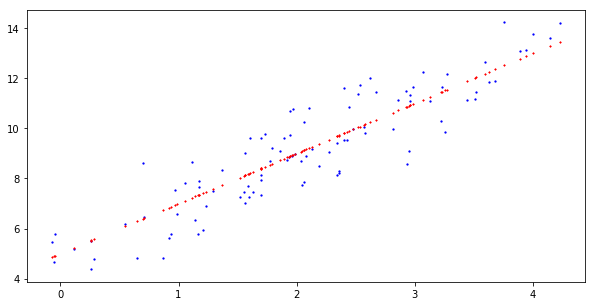

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, '.', color='blue', markersize=2.5)
plt.plot(x, 5. + 2. * x, '*', color='red', markersize=1.5)

In [3]:
def batch_step(data, b, w, alpha=0.005):
    b_grad = 0
    w_grad = 0
    N = data.shape[0]
    for i in range(N):
        x = data[i][0]
        y = data[i][1]
        b_grad += -(2./float(N)) * (y - (b + w * x))
        w_grad += -(2./float(N)) * x * (y - (b + w * x))
    b_new = b - alpha * b_grad
    w_new = w - alpha * w_grad
    return b_new, w_new

In [4]:
b = 0.
w = 0.
alpha = 0.01

for i in range(10000):
    b_new, w_new = batch_step(data, b, w, alpha=alpha)
    b = b_new
    w = w_new
    if i % 1000 == 0:
        print('{}: b = {}, w = {}'.format(i, b_new, w_new))
        
print('final: b = {}, w = {}'.format(b, w))

0: b = 0.182119848515, w = 0.418657084501
1000: b = 4.71317690463, w = 2.12235256332
2000: b = 4.82183332641, w = 2.07861715642
3000: b = 4.82540105864, w = 2.07718110489
4000: b = 4.82551820509, w = 2.07713395216
5000: b = 4.82552205159, w = 2.0771324039
6000: b = 4.82552217789, w = 2.07713235306
7000: b = 4.82552218203, w = 2.07713235139
8000: b = 4.82552218217, w = 2.07713235134
9000: b = 4.82552218217, w = 2.07713235134
final: b = 4.82552218217, w = 2.07713235134


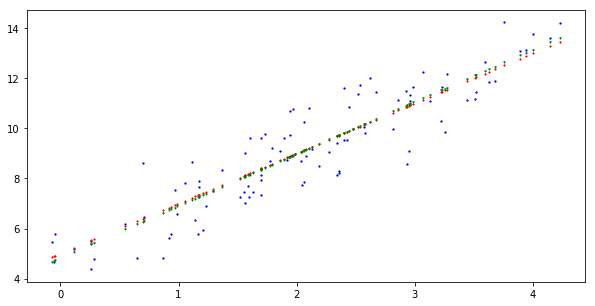

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, '.', color='blue', markersize=2.5)
plt.plot(x, 5. + 2. * x, '*', color='red', markersize=1.5)
plt.plot(x, b + w * x, 'v', color='green', markersize=1.5)

## Stochastic gradient descent with to learn parameters of linear equation

Stochastic gradient descent shuffles the data and looks at one data point at a time to learn/update the parameters.

In [6]:
def stochastic_step(x, y, b, w, N, alpha=0.005):
    b_grad = -(2./N) * (y - (b + w * x))
    w_grad = -(2./N) * x * (y - (b + w * x))
    
    b_new = b - alpha * b_grad
    w_new = w - alpha * w_grad
    return b_new, w_new

In [7]:
from random import shuffle

b = 0.
w = 0.
alpha = 0.01
N = float(data.shape[0])

for i in range(2000):
    indices = list(range(data.shape[0]))
    shuffle(indices)
    
    for j in indices:
        b_new, w_new = stochastic_step(data[j][0], data[j][1], b, w, N, alpha=alpha)
        b = b_new
        w = w_new
    
    if i % 1000 == 0:
        print('{}: b = {}, w = {}'.format(i, b_new, w_new))
        
print('final: b = {}, w = {}'.format(b, w))

0: b = 0.172389256089, w = 0.393491559436
1000: b = 4.71266083284, w = 2.12256849052
final: b = 4.82164106568, w = 2.07827568777


## Use scikit-learn to learn the parameters of the linear equation

As you can see below, the intercept and coefficient are nearly identical to batch and stochastic gradient descent algorithms.

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(data[:, 0].reshape(-1, 1), data[:, 1])
print(lr.intercept_)
print(lr.coef_)

4.825522182175065
[2.07713235]


# Multiple linear regression

This time we apply the gradient descent algorithm to a multiple linear regression problem.

$ y = 5.0 + 2.0 x_0 + 1.0 x_1 + 3.0 x_2 + 0.5 x_3 + 1.5 x_4$

In [9]:
x0 = 2.0 + np.random.standard_normal(num_samples)
x1 = 1.0 + np.random.standard_normal(num_samples)
x2 = -1.0 + np.random.standard_normal(num_samples)
x3 = -2.0 + np.random.standard_normal(num_samples)
x4 = 0.5 + np.random.standard_normal(num_samples)
y = 5.0 + 2.0 * x0 + 1.0 * x1 + 3.0 * x2 + 0.5 * x3 + 1.5 * x4 + np.random.standard_normal(num_samples)

data = np.column_stack((x0, x1, x2, x3, x4, y))
print('data shape {}'.format(data.shape))

data shape (100L, 6L)


## Batch gradient descent

In [10]:
def multi_batch_step(data, b, w, alpha=0.005):
    num_x = data.shape[1] - 1
    b_grad = 0
    w_grad = np.zeros(num_x)
    N = data.shape[0]
    
    for i in range(N):        
        y = data[i][num_x]
        x = data[i, 0:num_x]
        b_grad += -(2./float(N)) * (y - (b + w.dot(x)))
        
        for j in range(num_x):
            x_ij = data[i][j]
            w_grad[j] += -(2./float(N)) * x_ij * (y - (b + w.dot(x)))
        
    b_new = b - alpha * b_grad
    w_new = np.array([w[i] - alpha * w_grad[i] for i in range(num_x)])
    return b_new, w_new

In [11]:
b = 0.
w = np.zeros(data.shape[1] - 1)
alpha = 0.01

for i in range(10000):
    b_new, w_new = multi_batch_step(data, b, w, alpha=alpha)
    b = b_new
    w = w_new
    if i % 1000 == 0:
        print('{}: b = {}, w = {}'.format(i, b_new, w_new))
        
print('final: b = {}, w = {}'.format(b, w))

0: b = 0.136327978832, w = [ 0.29275746  0.15943176 -0.06731627 -0.2838181   0.1087194 ]
1000: b = 3.69074558546, w = [ 2.05046789  0.99662839  2.91470927 -0.01336945  1.51371104]
2000: b = 4.51136474575, w = [1.89258252 0.96694568 2.9696926  0.15595645 1.47558119]
3000: b = 4.72828192029, w = [1.8508481  0.95909955 2.98422654 0.20071495 1.46550219]
4000: b = 4.78562040683, w = [1.83981629 0.95702555 2.98806834 0.21254612 1.46283797]
5000: b = 4.80077689246, w = [1.83690022 0.95647732 2.98908386 0.2156735  1.46213373]
6000: b = 4.8047832601, w = [1.8361294  0.95633241 2.9893523  0.21650017 1.46194757]
7000: b = 4.80584227747, w = [1.83592565 0.9562941  2.98942325 0.21671869 1.46189837]
8000: b = 4.80612221129, w = [1.83587179 0.95628398 2.98944201 0.21677645 1.46188536]
9000: b = 4.80619620719, w = [1.83585755 0.9562813  2.98944697 0.21679172 1.46188192]
final: b = 4.80621575743, w = [1.83585379 0.95628059 2.98944828 0.21679575 1.46188101]


## Scikit-learn

In [12]:
lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(data[:, 0:data.shape[1] - 1], data[:, data.shape[1] - 1])
print(lr.intercept_)
print(lr.coef_)

4.806222794782922
[1.83585244 0.95628034 2.98944875 0.2167972  1.46188068]


# References

* [An Introduction to Gradient Descent and Linear Regression](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)
* [Stochastic Gradient Descent](https://www.youtube.com/watch?v=UfNU3Vhv5CA)
* [Rules of calculus - multivariate](http://www.columbia.edu/itc/sipa/math/calc_rules_multivar.html)
* [How to overplot a line on a scatter plot in python?](https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python)
* [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

# Take a Look!

Take a look at [Dr. Kathryn Laskey](http://seor.vse.gmu.edu/~klaskey/)!